In [1]:
import numpy              as np
import pandas             as pd
import seaborn            as sns
import matplotlib.pyplot  as plt
import matplotlib.ticker  as mtick

from   matplotlib.lines     import Line2D
from   matplotlib.patches   import Patch

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Setup plots configurations

In [2]:
def setup_plot_config():
    plt.rc('font', size=18)
    plt.rc('axes', labelsize=24)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.rc('legend', fontsize=20)
    plt.rc('legend', title_fontsize=20)
    plt.rc('lines', linewidth=3)
    plt.rc('lines', markersize=15)

## Fig. 1 (a)

---

* **Individual user** explanations with GREEDY on samples of *20 users* with bias ~0.7, ~0.8, ~0.9

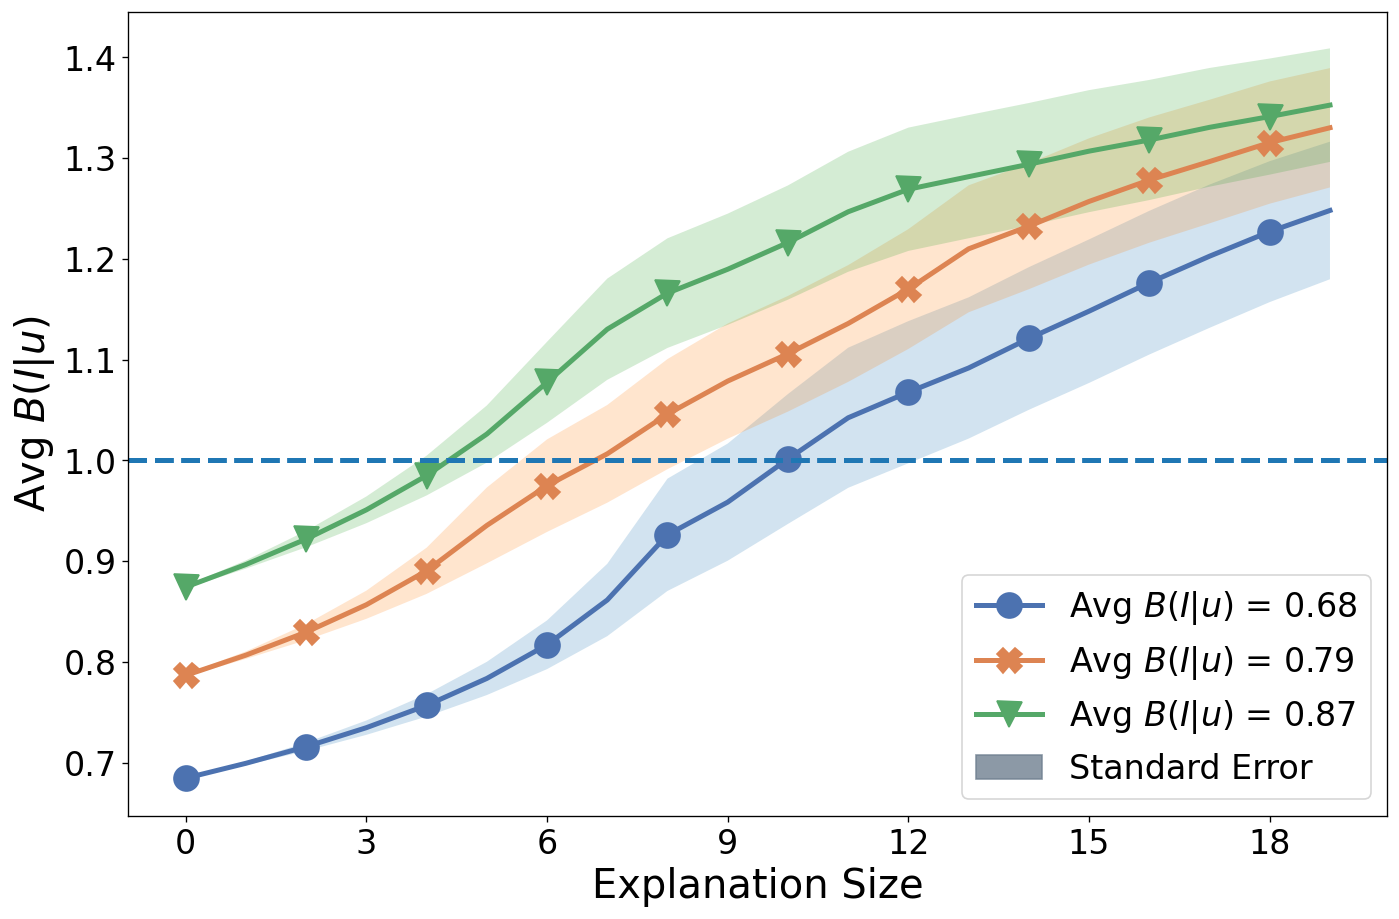

In [39]:
setup_plot_config()
output_format = 'png'

exp_filenames = ['./data/fig1a_0.7.tsv', './data/fig1a_0.8.tsv', './data/fig1a_0.9.tsv']
colors = sns.color_palette('deep')
markers = ['o', 'X', 'v']

beta_initial_avg = []

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), dpi=120)
for file_ind in range(len(exp_filenames)):
    y_values_all = np.genfromtxt(fname=exp_filenames[file_ind], delimiter='\t') # Read data
    y_values_all_avg = np.mean(y_values_all, axis=0)
    
    beta_initial_avg.append(y_values_all_avg[0]) # Store initial avg beta
    
    # Plot beta increase
    ax.plot(np.arange(y_values_all_avg.shape[0]),
            y_values_all_avg,
            color=colors[file_ind],
            marker=markers[file_ind],
            markevery=y_values_all_avg.shape[0]//10)
    
    # Plot SE
    error = np.std(y_values_all, axis=0)/(y_values_all.shape[0])**(1/2)
    error_label = 'Standard Error'
    
    ax.fill_between(x=np.arange(y_values_all_avg.shape[0]),
                    y1=(y_values_all_avg + error),
                    y2=(y_values_all_avg - error),
                    alpha=0.2)
    
    # Plot fairness baseline
    ax.axhline(y=1, linestyle='dashed')
    
# String with the y-label for convenience
# Note: output filename should be changed accordingly
y_label_str = 'B(I|u)'
    
# Setup legend
legend_shapes = [Line2D([0,1],[0,1], color=colors[i], marker=markers[i])
                 for i in range(len(exp_filenames))]
legend_shapes += [Patch(label=error_label, color='slategray', alpha=0.8)]
legend_texts = [r"Avg ${}$".format(y_label_str) + f" = {round(beta_initial_avg[i], 2)}"
                for i in range(len(exp_filenames))]
legend_texts += [error_label]
ax.legend(legend_shapes, legend_texts, loc='lower right')

# Set axes labels
plt.xlabel('Explanation Size')
plt.ylabel('Avg ${}$'.format(y_label_str))
    
# Force integer x-ticks
ax.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig(f"./plots/fig1a.{output_format}")

## Fig. 1 (b)

---

* Qualitative example of **individual user** explanations given for a specific user.

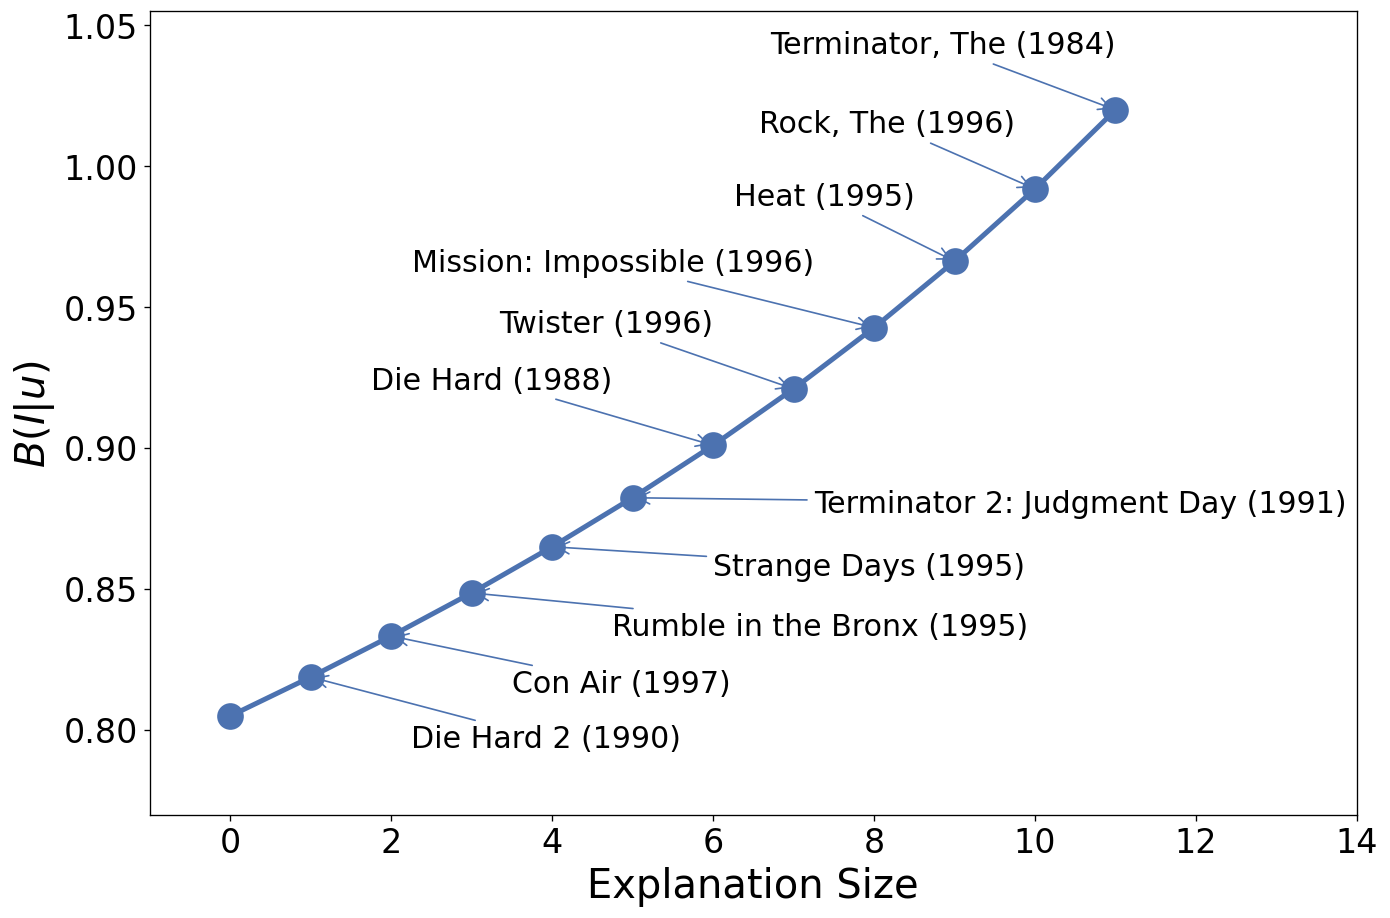

In [40]:
setup_plot_config()
output_format = 'png'

exp_filename = './data/fig1b_data.tsv'

colors = sns.color_palette('deep')
offset = 0.02 # Annotation offset

df = pd.read_csv(exp_filename, delimiter='\t', header=0) # Read data

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), dpi=120)

# Plot beta increase
ax.plot(np.arange(df['Beta'].values.shape[0]),
        df['Beta'].values,
        color=colors[0],
        marker='o')

# Annotate plot with the movie titles
for i in range(1, len(df)):
    cur_beta = df.loc[i, 'Beta']
    
    if i <= 5:
        xytext_x, xytext_y = i+1+i*0.25, cur_beta - 0.03 + 0.005*i
        ha_cur = 'left'
    else:
        xytext_x, xytext_y = i+1-2.5+(i-5)*0.25, cur_beta + 0.02
        ha_cur = 'right'
        
    ax.annotate(f"{df.loc[i, 'Title']}",
                xy=(i, cur_beta),
                xytext=(xytext_x, xytext_y),
                arrowprops=dict(color=colors[0], arrowstyle="->"),
                ha=ha_cur)

ax.set_xlabel('Explanation Size')
ax.set_ylabel(r'$B(I|u)$')

# Make frame larger
ax.set_xlim(-1, len(df) + 2)
ax.set_ylim(df.loc[0, 'Beta'] - 0.035, df.loc[len(df)-1, 'Beta'] + 0.035)

plt.tight_layout()
plt.savefig(f"./plots/fig1b.{output_format}")

## Fig. 2 (a)

---

* **Individual item** explanations on synthetic data on samples of *20 users* for each synthetic dataset created.

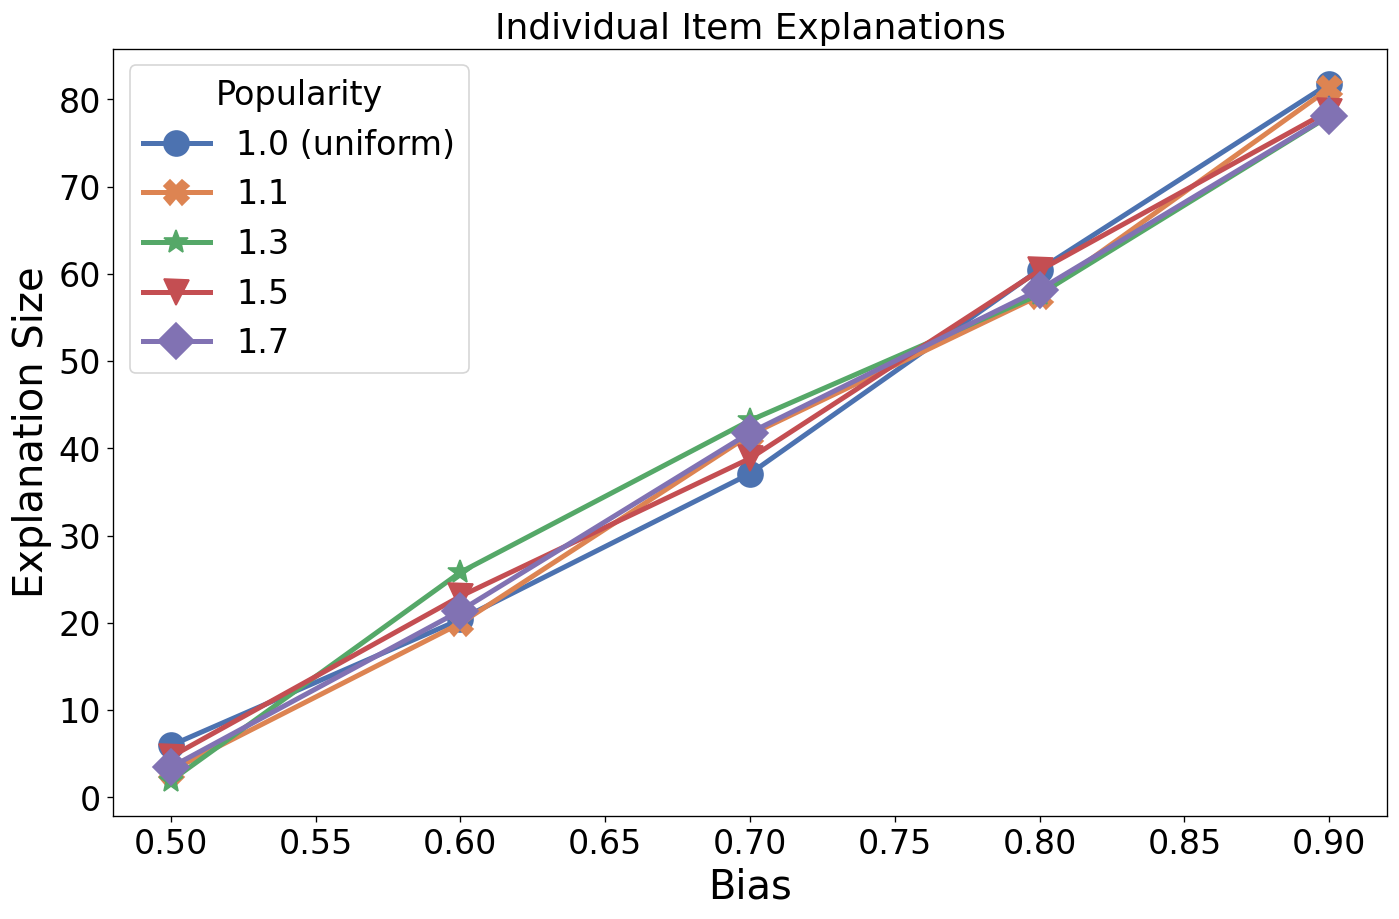

In [41]:
setup_plot_config()
output_format = 'png'

exp_filename = './data/fig2a_data.tsv'

markers = ['o', 'X', '*', 'v', 'D']
colors = sns.color_palette('deep')

data = np.genfromtxt(fname=exp_filename, delimiter='\t', skip_header=1) # Read data

un_pop = np.unique(data[:, 1]) # Make array with unique pop values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), dpi=120)
for i in range(un_pop.shape[0]):
    inds = np.where(data[:, 1] == un_pop[i])[0]

    ax.plot(data[inds, 0],
            data[inds, 2],
            label=f"{str(un_pop[i]) + ' (uniform)' if un_pop[i] == 1 else str(un_pop[i])}",
            color=colors[i],
            marker=markers[i])

ax.set_title('Individual Item Explanations')
ax.set_xlabel('Bias')
ax.set_ylabel(r'Explanation Size')
ax.legend(title='Popularity')

plt.tight_layout()
plt.savefig(f"./plots/fig2a.{output_format}")

## Fig. 2 (b)

---

* **Individual user** explanations comparison between *Greedy* and *Sort* on random sample of *50 users*.

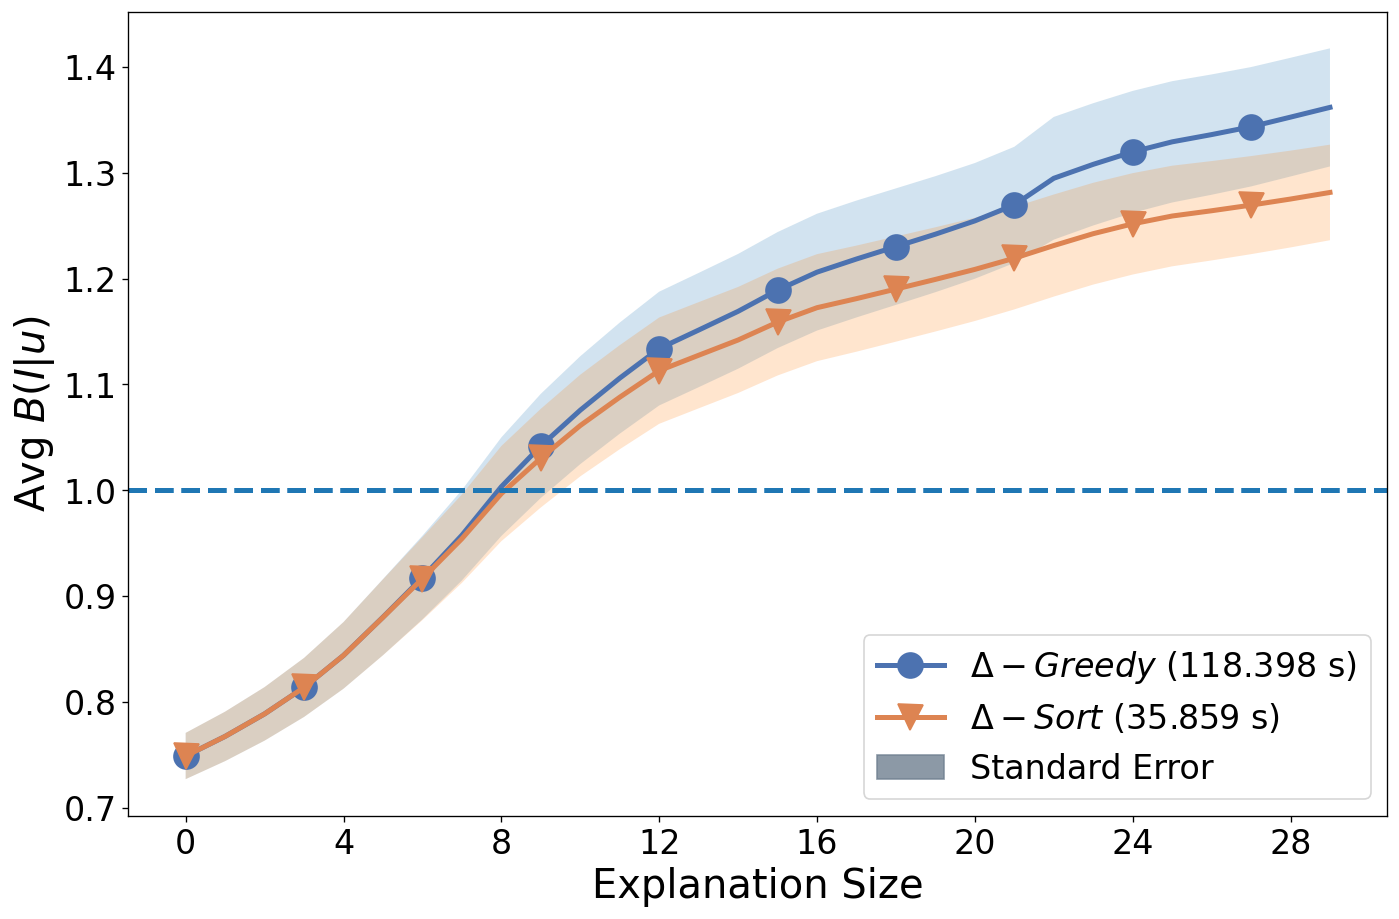

In [42]:
setup_plot_config()
output_format = 'png'

exp_filenames = ['./data/fig2b_greedy.tsv', './data/fig2b_delta_sort.tsv']
colors = sns.color_palette('deep')
markers = ['o', 'v']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), dpi=120)
for file_ind in range(len(exp_filenames)):
    y_values_all = np.genfromtxt(fname=exp_filenames[file_ind], delimiter='\t') # Read data
    y_values_all_avg = np.mean(y_values_all, axis=0)
    
    # Plot beta increase
    ax.plot(np.arange(y_values_all_avg.shape[0]),
            y_values_all_avg,
            color=colors[file_ind],
            marker=markers[file_ind],
            markevery=y_values_all_avg.shape[0]//10)
    
    # Plot SE
    error = np.std(y_values_all, axis=0)/(y_values_all.shape[0])**(1/2)
    error_label = 'Standard Error'
    
    ax.fill_between(x=np.arange(y_values_all_avg.shape[0]),
                    y1=(y_values_all_avg + error),
                    y2=(y_values_all_avg - error),
                    alpha=0.2)
    
    # Plot fairness baseline
    ax.axhline(y=1, linestyle='dashed')
    
# Setup legend
legend_shapes = [Line2D([0,1],[0,1], color=colors[i], marker=markers[i])
                 for i in range(len(exp_filenames))]
legend_shapes += [Patch(label=error_label, color='slategray', alpha=0.8)]
# Note: Algorithms wall time is hardcoded
legend_texts = [r'$\Delta-Greedy$ (118.398 s)',
                r'$\Delta-Sort$ (35.859 s)']
legend_texts += [error_label]
ax.legend(legend_shapes, legend_texts, loc='lower right')

# Set axes labels
plt.xlabel('Explanation Size')
plt.ylabel('Avg $B(I|u)$')
    
# Force integer x-ticks
ax.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig(f"./plots/fig2b.{output_format}")

## Fig. 3 (a)

---

* **User-group** explanations; comparison between *ItemExplain, EdgeExplain and UserExplain*

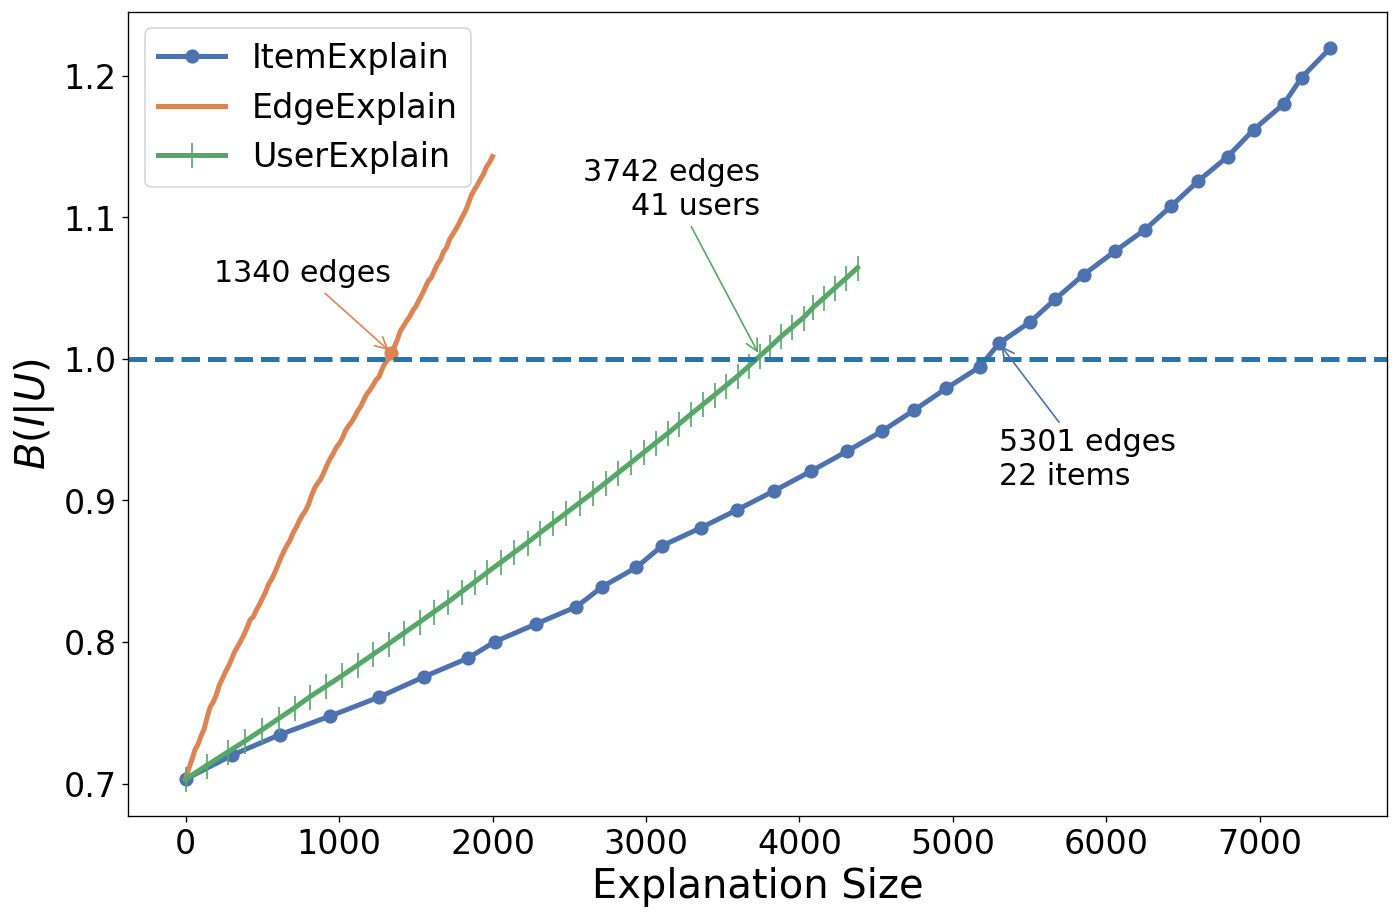

In [43]:
setup_plot_config()
output_format = 'png'

exp_filename = './data/fig3a_data.tsv'
colors = sns.color_palette('deep')

# Read data
with open(exp_filename) as f:
    lines = f.readlines()
    
    labels, beta, edges = [], [], []
    for i in range(0, len(lines), 3):
        labels.append(lines[i].strip())
        beta.append(np.array(lines[i+1].split()).astype(float))
        edges.append(np.array(lines[i+2].split()).astype(int))
        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), dpi=120)

# Plot ItemExplain
cur_label, cur_beta, cur_edges = labels[0], beta[0], edges[0]

fairness_ind = np.argmax(cur_beta >= 1) # Index of fairness (beta = 1) achieved

ax.plot(cur_edges, cur_beta, marker='.', color=colors[0], label=cur_label)
ax.annotate(f"{cur_edges[fairness_ind]} edges\n{fairness_ind} items",
            xy=(cur_edges[fairness_ind], cur_beta[fairness_ind]),
            xytext=(cur_edges[fairness_ind], cur_beta[fairness_ind] - 0.1),
            arrowprops=dict(color=colors[0], arrowstyle="->"),
            ha='left')

# Plot EdgeExplain
cur_label, cur_beta, cur_edges = labels[1], beta[1], edges[1]

fairness_ind = np.argmax(cur_beta >= 1) # Index of fairness (beta = 1) achieved

ax.plot(cur_edges, cur_beta, color=colors[1], label=cur_label)

# Show a dot where beta >= 1
ax.plot([cur_edges[fairness_ind]], [cur_beta[fairness_ind]], marker='.', color=colors[1])

ax.annotate(f"{cur_edges[fairness_ind]} edges",
            xy=(cur_edges[fairness_ind], cur_beta[fairness_ind]),
            xytext=(cur_edges[fairness_ind], cur_beta[fairness_ind] + 0.05),
            arrowprops=dict(color=colors[1], arrowstyle="->"),
            ha='right')

# Plot UserExplain
cur_label, cur_beta, cur_edges = labels[2], beta[2], edges[2]

fairness_ind = np.argmax(cur_beta >= 1) # Index of fairness (beta = 1) achieved

ax.plot(cur_edges, cur_beta, marker='|', color=colors[2], label=cur_label)
ax.annotate(f"{cur_edges[fairness_ind]} edges\n{fairness_ind} users",
            xy=(cur_edges[fairness_ind], cur_beta[fairness_ind]),
            xytext=(cur_edges[fairness_ind], cur_beta[fairness_ind] + 0.1),
            arrowprops=dict(color=colors[2], arrowstyle="->"),
            ha='right')

# Plot horizontal fairness line
ax.axhline(y=1, linestyle='dashed')

# Setup labels
ax.set_xlabel('Explanation Size')
ax.set_ylabel(r'$B(I|U)$')

ax.legend()

plt.tight_layout()
plt.savefig(f"./plots/fig3a.{output_format}")

## Fig. 3 (b)

---

* **Item-group** explanations; comparison between *ItemExplain, EdgeExplain and UserExplain*

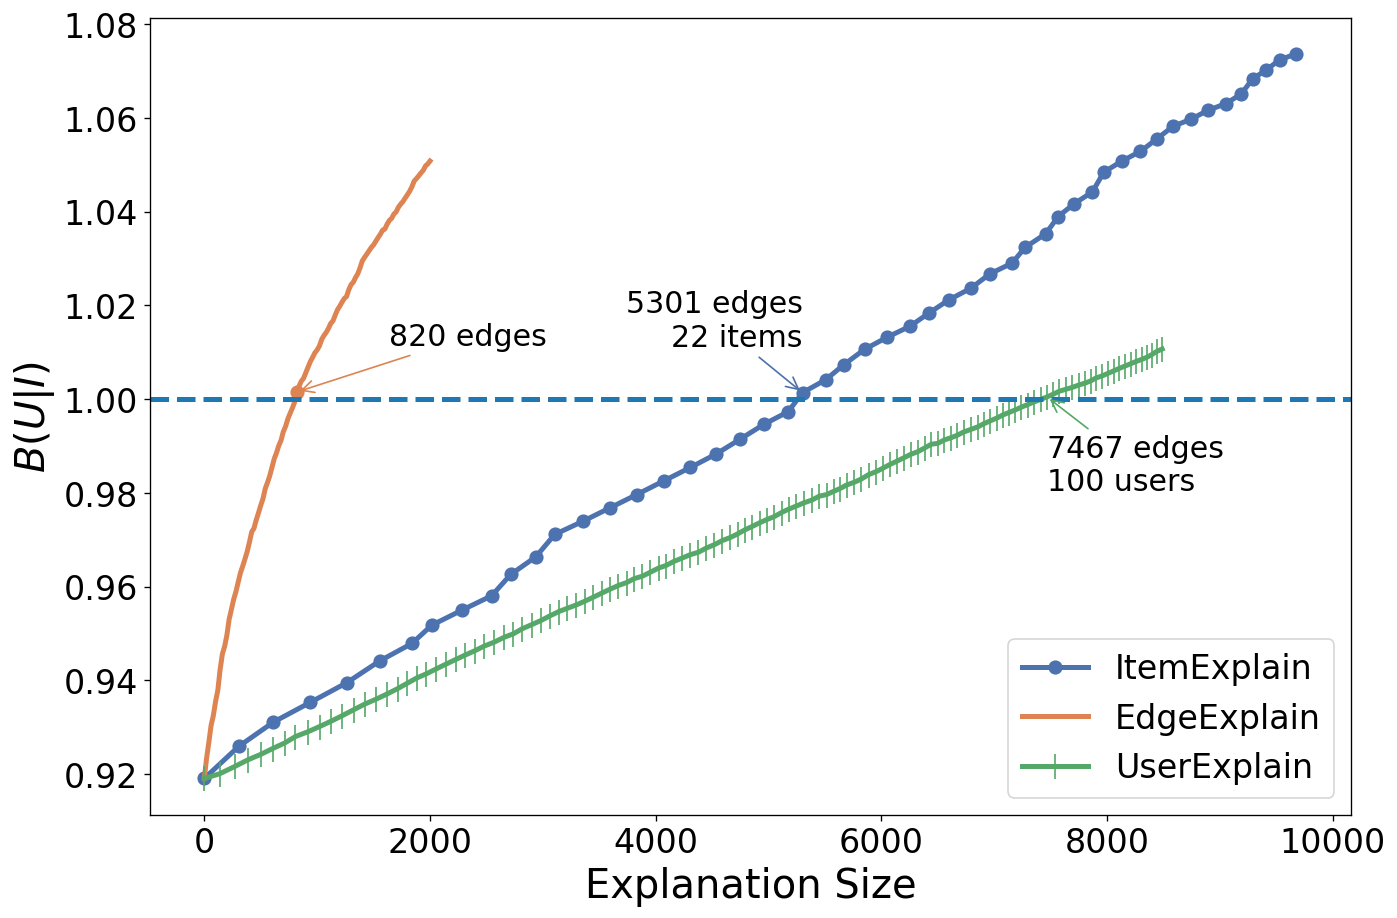

In [44]:
setup_plot_config()
output_format = 'png'

exp_filename = './data/fig3b_data.tsv'
colors = sns.color_palette('deep')

# Read data
with open(exp_filename) as f:
    lines = f.readlines()
    
    labels, beta, edges = [], [], []
    for i in range(0, len(lines), 3):
        labels.append(lines[i].strip())
        beta.append(np.array(lines[i+1].split()).astype(float))
        edges.append(np.array(lines[i+2].split()).astype(int))
        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), dpi=120)

# Plot ItemExplain
cur_label, cur_beta, cur_edges = labels[0], beta[0], edges[0]

fairness_ind = np.argmax(cur_beta >= 1) # Index of fairness (beta = 1) achieved

ax.plot(cur_edges, cur_beta, marker='.', color=colors[0], label=cur_label)
ax.annotate(f"{cur_edges[fairness_ind]} edges\n{fairness_ind} items",
            xy=(cur_edges[fairness_ind], cur_beta[fairness_ind]),
            xytext=(cur_edges[fairness_ind], cur_beta[fairness_ind] + 0.01),
            arrowprops=dict(color=colors[0], arrowstyle="->"),
            ha='right')

# Plot EdgeExplain
cur_label, cur_beta, cur_edges = labels[1], beta[1], edges[1]

fairness_ind = np.argmax(cur_beta >= 1) # Index of fairness (beta = 1) achieved

ax.plot(cur_edges, cur_beta, color=colors[1], label=cur_label)

# Show a dot where beta >= 1
ax.plot([cur_edges[fairness_ind]], [cur_beta[fairness_ind]], marker='.', color=colors[1])

ax.annotate(f"{cur_edges[fairness_ind]} edges",
            xy=(cur_edges[fairness_ind], cur_beta[fairness_ind]),
            xytext=(cur_edges[fairness_ind]*2, cur_beta[fairness_ind] + 0.01),
            arrowprops=dict(color=colors[1], arrowstyle="->"),
            ha='left')

# Plot UserExplain
cur_label, cur_beta, cur_edges = labels[2], beta[2], edges[2]

fairness_ind = np.argmax(cur_beta >= 1) # Index of fairness (beta = 1) achieved

ax.plot(cur_edges, cur_beta, marker='|', color=colors[2], label=cur_label)
ax.annotate(f"{cur_edges[fairness_ind]} edges\n{fairness_ind} users",
            xy=(cur_edges[fairness_ind], cur_beta[fairness_ind]),
            xytext=(cur_edges[fairness_ind], cur_beta[fairness_ind] - 0.02),
            arrowprops=dict(color=colors[2], arrowstyle="->"),
            ha='left')

# Plot horizontal fairness line
ax.axhline(y=1, linestyle='dashed')

# Setup labels
ax.set_xlabel('Explanation Size')
ax.set_ylabel(r'$B(U|I)$')

ax.legend()

plt.tight_layout()
plt.savefig(f"./plots/fig3b.{output_format}")

## Fig. 4 (a)

---

* **Individual item** explanations for initial $Avg B(M|i) \in  [0.6, 0.75, 0.9]$

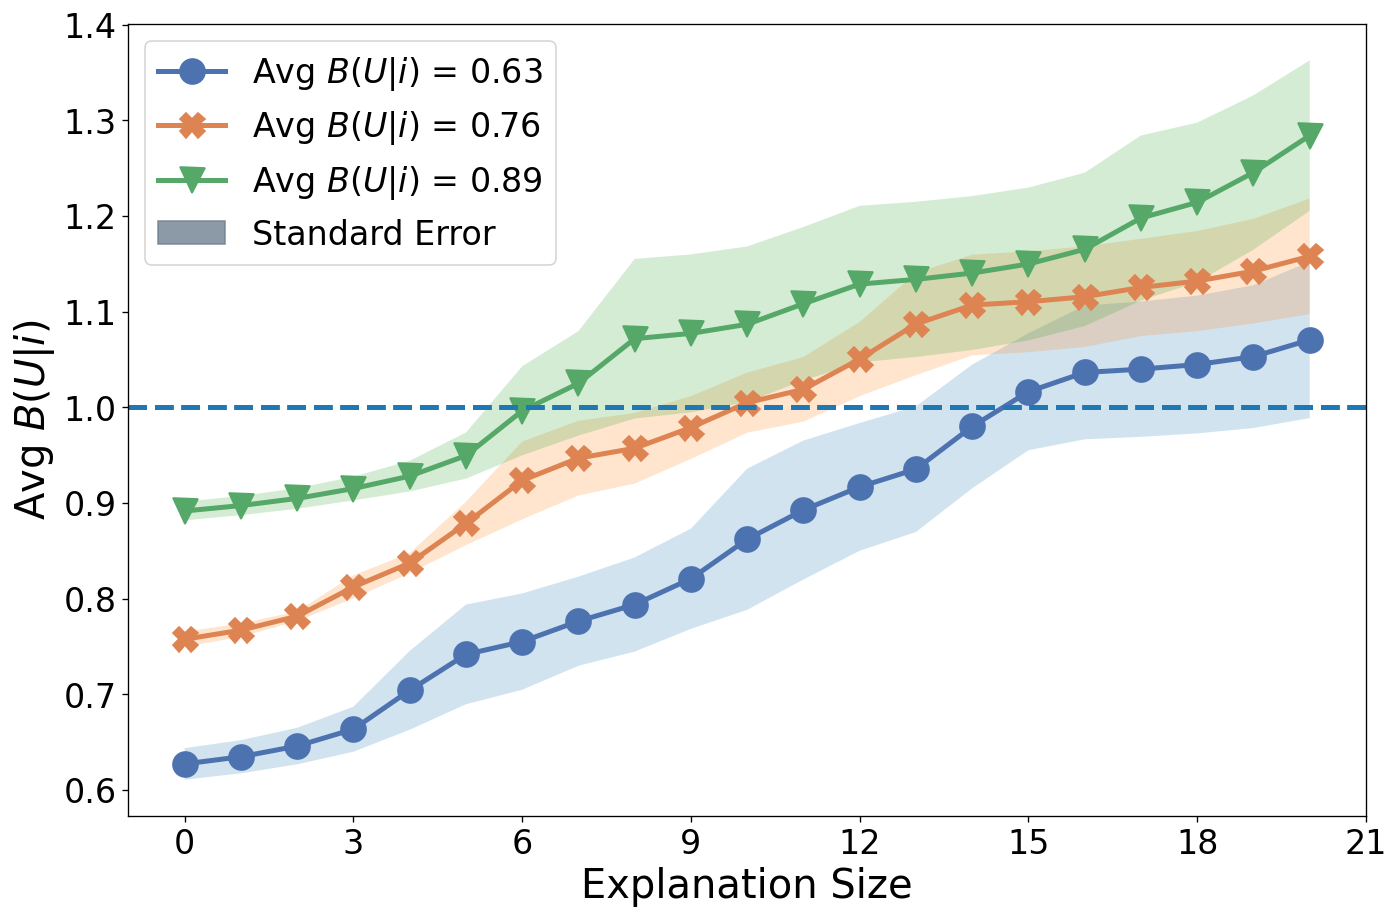

In [45]:
setup_plot_config()
output_format = 'png'

exp_filenames = ['./data/fig4a_0.6.tsv', './data/fig4a_0.75.tsv', './data/fig4a_0.9.tsv']
colors = sns.color_palette('deep')
markers = ['o', 'X', 'v']

beta_initial_avg = []

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), dpi=120)
for file_ind in range(len(exp_filenames)):
    y_values_all = np.genfromtxt(fname=exp_filenames[file_ind], delimiter='\t') # Read data
    y_values_all_avg = np.mean(y_values_all, axis=0)
    
    beta_initial_avg.append(y_values_all_avg[0]) # Store initial avg beta
    
    # Plot beta increase
    ax.plot(np.arange(y_values_all_avg.shape[0]),
            y_values_all_avg,
            color=colors[file_ind],
            marker=markers[file_ind])
    
    # Plot SE
    error = np.std(y_values_all, axis=0)/(y_values_all.shape[0])**(1/2)
    error_label = 'Standard Error'
    
    ax.fill_between(x=np.arange(y_values_all_avg.shape[0]),
                    y1=(y_values_all_avg + error),
                    y2=(y_values_all_avg - error),
                    alpha=0.2)
    
    # Plot fairness baseline
    ax.axhline(y=1, linestyle='dashed')
    
# String with the y-label for convenience
# Note: output filename should be changed accordingly
y_label_str = 'B(U|i)'
    
# Setup legend
legend_shapes = [Line2D([0,1],[0,1], color=colors[i], marker=markers[i])
                 for i in range(len(exp_filenames))]
legend_shapes += [Patch(label=error_label, color='slategray', alpha=0.8)]
legend_texts = [r"Avg ${}$".format(y_label_str) + f" = {round(beta_initial_avg[i], 2)}"
                for i in range(len(exp_filenames))]
legend_texts += [error_label]
ax.legend(legend_shapes, legend_texts, loc='upper left')

# Set axes labels
plt.xlabel('Explanation Size')
plt.ylabel(f'Avg ${y_label_str}$')
    
# Force integer x-ticks
ax.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig(f"./plots/fig4a.{output_format}")

## Fig. 4 (b)

---

* Qualitative example of **individual item** explanations given for a movie **Oscar & Lucinda (1997)**.

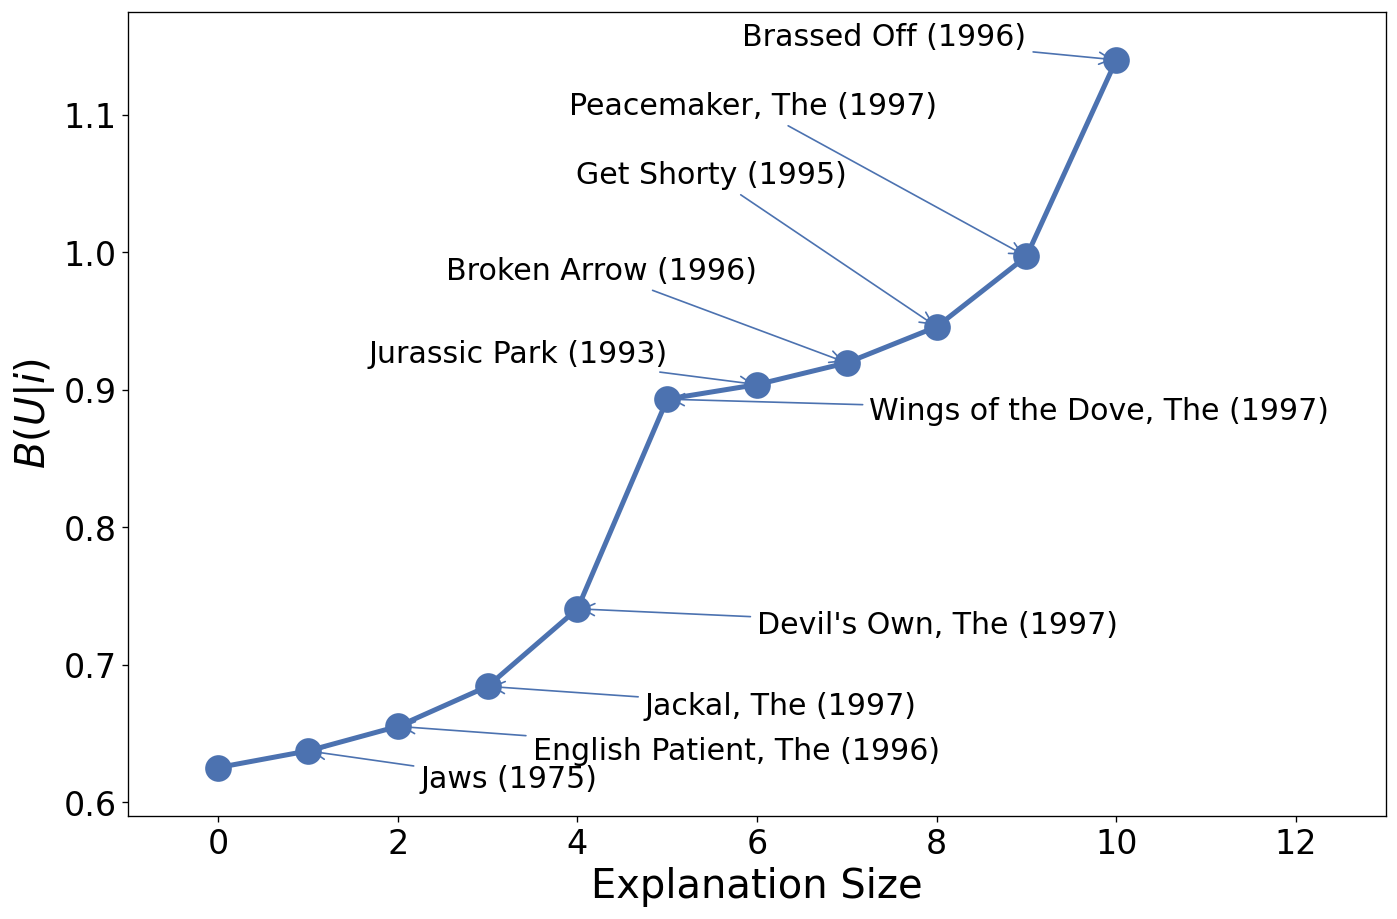

In [46]:
setup_plot_config()
output_format = 'png'

exp_filename = './data/fig4b_data.tsv'

colors = sns.color_palette('deep')
offset = 0.02 # Annotation offset

df = pd.read_csv(exp_filename, delimiter='\t', header=0) # Read data

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), dpi=120)

# Plot beta increase
ax.plot(np.arange(df['Beta'].values.shape[0]),
        df['Beta'].values,
        color=colors[0],
        marker='o')

# Annotate plot with the movie titles
coords = [(5, 0.92), (6, 0.98), (7, 1.05), (8, 1.1), (9, 1.15)]
for i in range(1, len(df)):
    cur_beta = df.loc[i, 'Beta']
    
    if i <= 5:
        xytext_x, xytext_y = i+1+i*0.25, cur_beta - 0.03 + 0.003*i
        ha_cur = 'left'
    else:
        xytext_x, xytext_y = coords[i-6][0], coords[i-6][1]
        ha_cur = 'right'
        
    ax.annotate(f"{df.loc[i, 'Title']}",
                xy=(i, cur_beta),
                xytext=(xytext_x, xytext_y),
                arrowprops=dict(color=colors[0], arrowstyle="->"),
                ha=ha_cur)

ax.set_xlabel('Explanation Size')
ax.set_ylabel(r'$B(U|i)$')

# Make frame larger
ax.set_xlim(-1, len(df) + 2)
ax.set_ylim(df.loc[0, 'Beta'] - 0.035, df.loc[len(df)-1, 'Beta'] + 0.035)

plt.tight_layout()
plt.savefig(f"./plots/fig4b.{output_format}")